<a href="https://colab.research.google.com/github/ds4ph-bme/project-4-HerambGupta/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4
1.  Consider the logistic curve 
$$
f(x) = \frac{e^{\beta_0 + \beta_1x}}{1 + e^{\beta_0 + \beta_1 x}}.
$$
Plot the curve for various values of $\beta_0$ and $\beta_1$ to see how changing $\beta_0$ and $\beta_1$ impact the curve. 
2.Consider the diamond dataset from [here](https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv). The documentation for the dataset can be found [here](https://lbelzile.github.io/lineaRmodels/example-price-of-diamonds.html). Fit a linear model with price as the outcome, carat, cut, color and clarity as predictors. For the variables that are not numeric (cut for example), [one hot encode them](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/). Break your data into (around 25%) testing and (around 75%) training data and evaluate the square root of the mean squared error on your testing data. Use any python function library that you'd like.   
3. Consider the covid data analyzed previously. Consider a country. Let $Z_i$ be the case count for day $i$ from the first infection. Let $Y_i$ be an indicator of whether a country's case count went strictly up or down on day $i$. That is, $Y_i = 1$ if $Z_i > Z_{i-1}$ and $Y_i = 0$ if $Z_i \leq Z_{i-1}$. Consider the logit model
$$
\mathrm{logit}\{P(Y_i = 1)\} = \beta_0 + \beta_1 Z_{i-1} + \beta_2 Z_{i-2} + \beta_3 Z_{i-3} + \beta_4 Z_{i-4}
$$
In other words, does the previous four days case values predict whether or not the number of cases will go up or down tomorrow? Perform a validation in two ways. Train on the first 75% of days for a country and then consider the accuracy on the last 25%. Call this the within country forecasting accuracy. Secondly, train on 100% of the days for one country and consider the accuracy when applied to a second country. Call this the between country forecasting accuracy. In both cases, calculate the accuracy for a 0.50 threshold.


#Question 1

Text(0.5, 1.0, ' Question 1')

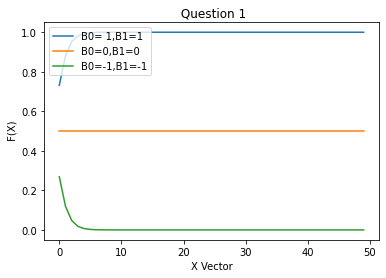

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def fx(b0,b1):
  x=np.arange(50)
  return np.exp(b0+b1*x)/(1+np.exp(b0+b1*x))


plt.plot(fx(1,1))
plt.plot(fx(0,0))
plt.plot(fx(-1,-1))
plt.legend(['B0= 1,B1=1 ','B0=0,B1=0','B0=-1,B1=-1'])
plt.xlabel('X Vector')
plt.ylabel(' F(X)')
plt.title(' Question 1')

#Question 2

In [3]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
import math

df=pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
cut_oh=pd.get_dummies(df.iloc[:,1])
color_oh=pd.get_dummies(df.iloc[:,2])
clarity_oh=pd.get_dummies(df.iloc[:,3])

n_df=pd.concat([df,cut_oh,color_oh,clarity_oh],axis=1)
n_df=n_df.rename(columns={'Very Good':'VG'})

trainFraction = .75
sample = np.random.uniform(size = 53940) < trainFraction
train = n_df[sample]
test = n_df[~sample]

X_train=train.drop(['cut','table','color','clarity','depth','price','x','y','z'],axis=1)
X_test=test.drop(['cut','table','color','clarity','depth','price','x','y','z'],axis=1)
reg = LinearRegression().fit(X_train,train.iloc[:,6])

yhat=reg.predict(X_test)
s=mean_squared_error(test.iloc[:,6],yhat)
s=math.sqrt(s)
print("The root mean squared error is",s)

The root mean squared error is 1161.4585261430625


#Question 3

In [4]:
import statsmodels as sm

dat=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


In [5]:
x=dat[dat['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).unstack()
## convert from tuple to array
x = np.asarray(x)  
## get case counts instead of cumulative counts
x = x[1 : x.size] - x[0 : (x.size - 1)]
## get the first non zero entry
x =  x[np.min(np.where(x !=  0)) : x.size]
n=len(x)
y=np.zeros(n)
for i in range(n-1):
  if(x[i+1]>x[i]):
    y[i]=1


#Within country forecasting
trainFraction = .75
sample = np.random.uniform(size = n) < trainFraction
x_train = x[sample]
x_test = x[~sample]
y_train=y[sample]
y_test=y[~sample]

x_f=[]
flag=[0 ,0 ,0 ,0]
x_f.append(flag)
x_f.append(flag)
x_f.append(flag)
x_f.append(flag)

for i in range(4,len(x_train)):
  t=[]
  t.append(x_train[i-4])
  t.append(x_train[i-3])
  t.append(x_train[i-2])
  t.append(x_train[i-1])
  x_f.append(t)
  

log_reg=LogisticRegression().fit(x_f,y_train)

x_f_test=[]
flag=[0 ,0 ,0 ,0]
x_f_test.append(flag)
x_f_test.append(flag)
x_f_test.append(flag)
x_f_test.append(flag)

for i in range(4,len(x_test)):
  t=[]
  t.append(x_test[i-4])
  t.append(x_test[i-3])
  t.append(x_test[i-2])
  t.append(x_test[i-1])
  x_f_test.append(t)
  

y_hat=log_reg.predict(x_f_test)

country_acc_1=np.mean(y_hat == y_test)

In [8]:
#Cross Country Accuracy


#Creating Testing Data
xx=dat[dat['Country/Region'] == 'Zambia'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).unstack()
## convert from tuple to array
xx = np.asarray(xx)  
## get case counts instead of cumulative counts
xx = xx[1 : xx.size] - xx[0 : (xx.size - 1)]
## get the first non zero entry
xx =  xx[np.min(np.where(xx !=  0)) : xx.size]
n=len(xx)
yx=np.zeros(n)
for i in range(n-1):
  if(xx[i+1]>xx[i]):
    yx[i]=1

xx_f=[]
flag=[0 ,0 ,0 ,0]
xx_f.append(flag)
xx_f.append(flag)
xx_f.append(flag)
xx_f.append(flag)

for i in range(4,len(xx)):
  t=[]
  t.append(xx[i-4])
  t.append(xx[i-3])
  t.append(xx[i-2])
  t.append(xx[i-1])
  xx_f.append(t)

#Creating Training Data
x_f=[]
flag=[0 ,0 ,0 ,0]
x_f.append(flag)
x_f.append(flag)
x_f.append(flag)
x_f.append(flag)

for i in range(4,len(x)):
  t=[]
  t.append(x[i-4])
  t.append(x[i-3])
  t.append(x[i-2])
  t.append(x[i-1])
  x_f.append(t)

log_reg=LogisticRegression().fit(x_f,y)
y_hat=log_reg.predict(xx_f)

between_acc_1=np.mean(y_hat == yx)
print('The within country forecasting accuracy is {0}'.format(country_acc_1))
print('The between country forecasting accuracy is {0}'.format(between_acc_1))

The within country forecasting accuracy is 0.42441860465116277
The between country forecasting accuracy is 0.5224416517055656
